In [1]:
import sys
%matplotlib inline
import pylab as plb
from tqdm import tqdm
import numpy as np
import mountaincar
from IPython.display import Image
from matplotlib import pyplot as plt
import gc, pickle, json, itertools
from sarsa_agent import *
from multiprocessing import Pool
import json

Escape latency for $\tau$ chart

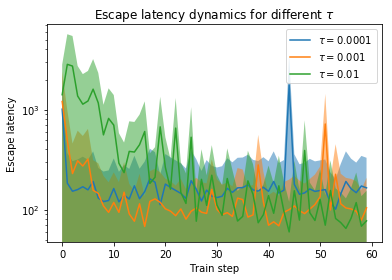

In [32]:
results = pickle.load(open('results_tau.p', 'rb'))
# grouping agents by their tau
taus = np.unique([np.inf, 0, 1] + list(np.logspace(-5, 5, 11)))
num_agents = 3
tau_to_agents = {tau: [results[key] for key in results.keys() if key[1] == tau] for tau in taus}
iterations = 60
assert all([len(x) == num_agents for x in tau_to_agents.values()]), "Cannot retrieve agents"

plt.figure()
plt.xlabel('Train step')
plt.ylabel('Escape latency')

plt.title('Escape latency dynamics for different $\\tau$')

taus_selected = [1e-4, 1e-3, 1e-2]

# plotting all learning curves
for tau in taus_selected:
    all_latencies = [agent.escape_latency for agent in tau_to_agents[tau]]
    mean_latency = np.mean(all_latencies, axis = 0)
    std_latency = np.mean(all_latencies, axis = 0)
    plt.plot(range(iterations), mean_latency, label = '$\\tau=%s$' % str(tau))
    plt.fill_between(range(iterations), mean_latency - std_latency, mean_latency + std_latency, alpha = 0.5)
        
plt.yscale("log")
plt.legend()
plt.show()

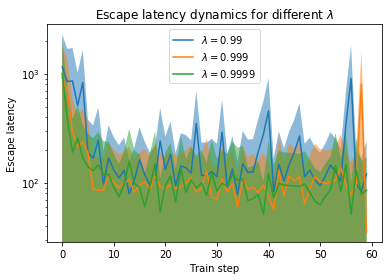

In [40]:
results = pickle.load(open('results_lambda_.p', 'rb'))
# grouping agents by their lambda_
lambda_s = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 0.999, 0.9999, 1]
num_agents = 3
lambda__to_agents = {lambda_: [results[key] for key in results.keys() if key[1] == lambda_] for lambda_ in lambda_s}
iterations = 60
assert all([len(x) == num_agents for x in lambda__to_agents.values()]), "Cannot retrieve agents"

plt.figure()
plt.xlabel('Train step')
plt.ylabel('Escape latency')

plt.title('Escape latency dynamics for different $\\lambda$')

lambda_s_selected = [0.99, 0.999, 0.9999]

# plotting all learning curves
for lambda_ in lambda_s_selected:
    all_latencies = [agent.escape_latency for agent in lambda__to_agents[lambda_]]
    mean_latency = np.mean(all_latencies, axis = 0)
    std_latency = np.mean(all_latencies, axis = 0)
    plt.plot(range(iterations), mean_latency, label = '$\\lambda=%s$' % str(lambda_))
    plt.fill_between(range(iterations), mean_latency - std_latency, mean_latency + std_latency, alpha = 0.5)
        
plt.yscale("log")
plt.legend()
plt.show()


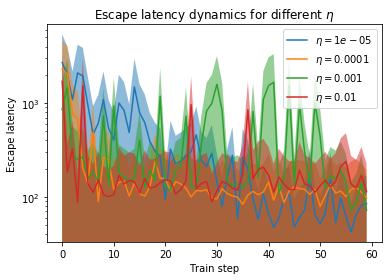

In [46]:
results = pickle.load(open('results_eta.p', 'rb'))
# grouping agents by their eta
etas = np.logspace(-10,0,11)
num_agents = 3
eta_to_agents = {eta: [results[key] for key in results.keys() if key[1] == eta] for eta in etas}
iterations = 60
assert all([len(x) == num_agents for x in eta_to_agents.values()]), "Cannot retrieve agents"

plt.figure()
plt.xlabel('Train step')
plt.ylabel('Escape latency')

plt.title('Escape latency dynamics for different $\\eta$')

etas_selected = [1e-5, 1e-4, 1e-3, 1e-2]

# plotting all learning curves
for eta in etas_selected:
    all_latencies = [agent.escape_latency for agent in eta_to_agents[eta]]
    mean_latency = np.mean(all_latencies, axis = 0)
    std_latency = np.mean(all_latencies, axis = 0)
    plt.plot(range(iterations), mean_latency, label = '$\\eta=%s$' % str(eta))
    plt.fill_between(range(iterations), mean_latency - std_latency, mean_latency + std_latency, alpha = 0.5)
        
plt.yscale("log")
plt.legend()
plt.show()